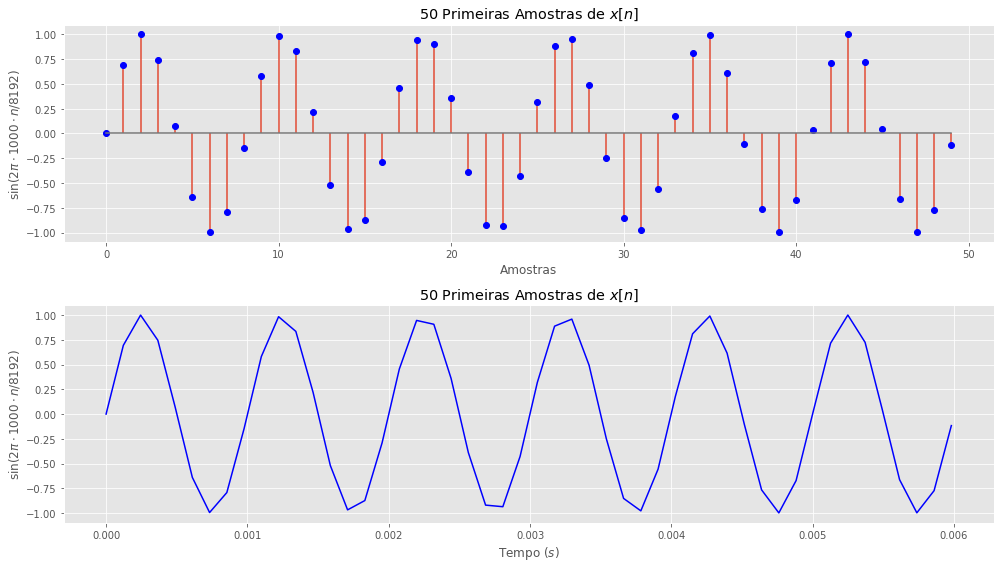

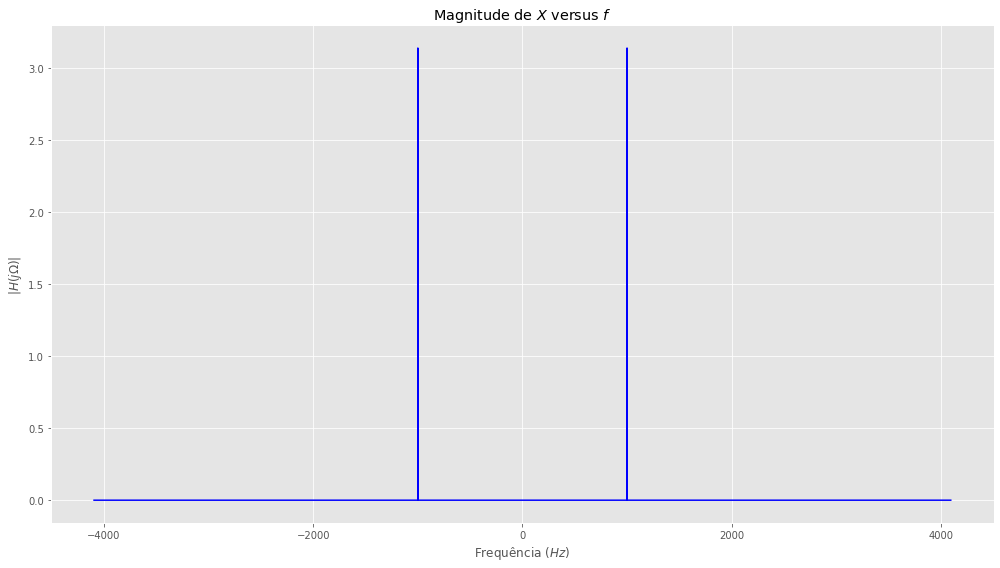

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

%matplotlib inline
import matplotlib.style as style
plt.rcParams["figure.figsize"] = (14, 8)
style.use('ggplot')

def ctfts(x: np.ndarray, T: float) -> (np.ndarray, np.ndarray):
    N = len(x)
    X = np.fft.fftshift(np.fft.fft(x, N)) * (2 * np.pi/N)
    w = np.linspace(-1, 1 - 1/N, N) / (2*T)
    return np.array(X, dtype=complex), w


def filter_small_values(arr, epsilon=3e-4):
    arr[np.where(np.abs(arr) < epsilon)] = 0
    return arr
    
Fs = 8192

n = np.array(range(Fs))
x = np.sin(2 * np.pi * 1000 * n/Fs)

t = n / Fs

plt.subplot(211)
plt.xlabel('Amostras')
plt.ylabel('$\sin(2 \pi \cdot 1000 \cdot n/8192)$')
plt.title('50 Primeiras Amostras de $x[n]$')
plt.stem(n[:50], x[:50],markerfmt='bo')

plt.subplot(212)
plt.xlabel('Tempo ($s$)')
plt.ylabel('$\sin(2 \pi \cdot 1000 \cdot n/8192)$')
plt.title('50 Primeiras Amostras de $x[n]$')
plt.plot(t[:50], x[:50],color="blue")
 


plt.tight_layout()
plt.show()

X, w = ctfts(x, 1/Fs)
plt.title('Magnitude de $X$ versus $f$')
plt.ylabel('$|H(j\Omega)|$')
plt.xlabel('Frequência ($Hz$)')
plt.plot(w, np.abs(X),color="blue")
plt.tight_layout()
plt.show()

def plot_graphs_for_freq(freq):
    x = np.sin(2 * np.pi * freq * n/Fs)
    
    plt.subplot(221)
    plt.xlabel('Amostras')
    plt.ylabel(f'$\sin(2 \pi \cdot {freq} \cdot n/8192)$')
    plt.title('50 Primeiras Amostras de $x[n]$')
    plt.stem(n[:50], x[:50],markerfmt='bo')
    
    plt.subplot(223)
    plt.xlabel('Tempo ($s$)')
    plt.ylabel(f'$\sin(2 \pi \cdot {freq} \cdot n/8192)$')
    plt.title('50 Primeiras Amostras de $x[n]$')
    plt.plot(t[:50], x[:50],color="blue")
    
    X, w = ctfts(x, 1/Fs)
    plt.subplot(222)
    plt.title('Magnitude de $X$ versus $f$')
    plt.ylabel('$|H(j\Omega)|$')
    plt.xlabel('Frequência ($Hz$)')
    plt.plot(w, np.abs(X),color="blue")
    
    plt.subplot(224)
    plt.title('Fase de $X$ versus $f$')
    plt.ylabel('$\\angle H(j\Omega)$')
    plt.xlabel('Frequência ($Hz$)')
    plt.plot(w, np.angle(filter_small_values(X), deg=True),color="blue")
    
    print(f'{freq}Hz Tone')
    ipd.display(ipd.Audio(x, rate=Fs))
    print()
    
    plt.tight_layout()
    plt.show()
    
    print('1,0kHz Tone')
    ipd.display(ipd.Audio(x, rate=Fs))
    print()
    
    print('1,5kHz Tone')
    ipd.display(ipd.Audio(x1, rate=Fs))
    print()
    
    print('2,0kHz Tone')
    ipd.display(ipd.Audio(x2, rate=Fs))
    print()
    
    plot_graphs_for_freq(3500)
    plot_graphs_for_freq(4000)
    plot_graphs_for_freq(4500)
    plot_graphs_for_freq(5000)
    plot_graphs_for_freq(5500)
    
    Fs = 8192
    omega_s = Fs * 2 * np.pi
    
    omega_o = 3000 * 2 * np.pi 
    b = 2000
    
    n = np.array(range(Fs))
    t = n / Fs
    
    x = np.sin(omega_o * t + b/2 * (t**2))

    print(f'Chirp')
    ipd.display(ipd.Audio(x, rate=Fs))
    print()
    x = np.sin(omega_o * t + b/2 * (t ** 2))
    
    f, t, Sxx = signal.spectrogram(x, Fs)
    plt.pcolormesh(t, f, Sxx)
    plt.title('Espectrograma de um chirp de $10s$')
    plt.ylabel('Frequência ($Hz$)')
    plt.xlabel('Tempo ($s$)')
    plt.show()
    
    
    print(f'10s Chirp')
    ipd.display(ipd.Audio(x, rate=Fs))
    print()
    
    n = np.array(range(50 * Fs))
    t = n / Fs
    
    x = np.sin(omega_o * t + b/2 * (t ** 2))
    
    f, t, Sxx = signal.spectrogram(x, Fs)
    plt.pcolormesh(t, f, Sxx)
    plt.title('Espectrograma de um chirp de $50s$')
    plt.ylabel('Frequência ($Hz$)')
    plt.xlabel('Tempo ($s$)')
    plt.show()
    
    
    print(f'50s Chirp')
    ipd.display(ipd.Audio(x, rate=Fs))
    print()


